# Teoría de la Información - parte 1

## Contenidos

- Cantidad de información y entropía
- Codificación de fuente


## Codificación de fuente

> Es el proceso que asigna un código a cada símbolo del diccionario


**Ejemplo:** Queremos codificar las letras del alfabeto (27) usando código binario

Si usamos un código de largo fijo necesitariamos al menos 5 bits: $2^5 = 32 > 27$

> Pero algunas letras se ocupan más que otras ¿Podemos aprovechar esto para comprimir un mensaje?

In [ ]:
import string
from collections import Counter

with open('../quijote.txt', 'r') as file:
    texto = file.read()

texto = texto.translate({ord(k): None for k in string.digits})
#texto = texto.lower().encode('ascii', 'ignore').decode("utf-8")
display(f"Largo del texto: {len(texto)}")
display(f"Cantidad de bits si uso 5 bits por símbolo: {len(texto)*5}")
print(texto)
Counter(texto).most_common()

**Intuición:** Podríamos reducir la cantidad de bits si usamos códigos más cortos para las letras más frecuentes

***

# Teoría de la información

Estudio matemático sobre la cuantificación y transmisión de la información 

Fue propuesto por **Claude Shannon** en 1948: *A Mathematical Theory of Communication*

Proporciona medidas para describir la información de un proceso: **Entropía** e **Información Mutua**

Tiene aplicaciones en telecomunicaciones, computación y biología (genética)

Fuerte influencia en la teoría de codificación y compresión

### Las dos fuentes

Sean dos fuentes **F1** y **F2** que pueden emitir uno entre cuatro símbolos: $A$, $B$, $C$ o $D$

**F1** es completamente aleatoria, es decir: $P(A) = P(B) = P(C) = P(D) = \frac{1}{4}$

Si queremos predecir el próximo valor emitido por **F1** ¿Cúal es el número mínimo de preguntas con respuesta si/no que debemos hacer?


<img src="../images/information1.svg" width="600">

> La respuesta es 2 para cualquiera de los símbolos

**F2** en cambio emite $A$, $B$, $C$ y $D$ con probabilidades $P(A) =\frac{1}{2}$, $P(B) =\frac{1}{4}$, $P(C) = \frac{1}{8}$ y $P(D) =\frac{1}{8}$, respectivamente

Si queremos predecir el próximo valor retornado por **F2** ¿Cúal es el número mínimo de preguntas con respuesta si/no que debemos hacer? 

<img src="../images/information2.svg" width="800">

> La respuesta es 1 para $A$, 2 para $B$ y 3 para $C$ y $D$



## Cantidad de información (según Shannon)

La cantidad de información de un símbolo $x$ es el logaritmo en base dos del recíproco de su probabilidad de aparición

$$
I(x) = \log_2 \left(\frac{1}{P(x)} \right) = \log_2 P(x)^{-1} = - \log_2 P(x),
$$

que es equivalente a la mínima cantidad de preguntas si/no que debemos hacer para adivinar su valor

La cantidad de información se mide en **bits**

>Un **bit** es la cantidad de información que se requiere para escoger entre **dos** alternativas equiprobables

La cantidad de información es también llamada **sorpresa**

> Mientras más improbable es un símbolo, más nos sorprendemos cuando observamos que ocurre

## Entropía

Sea una variable aleatoria $X$ (fuente) con $N$ resultados posibles (símbolos) $\{x_1, x_2, \ldots, x_N\}$

Cada símbolo $x_i$ tiene una probabilidad $p_i \in [0, 1]$ y $\sum_{i=1}^N p_i = 1$ 

Cada símbolo tiene una cantidad de información  $I(x_i) = -\log_2 \left( p_i \right)$ 

Definimos la **cantidad de información promedio** de $X$ como
$$
\begin{align}
H (X) &= \mathbb{E}_{x\sim X} \left [ - \log P(X=x) \right ]  \nonumber \\
&= - \sum_{i=1}^N P(X=x_i) \log_2 P(X=x_i)  \nonumber \\
&= - \sum_{i=1}^N p_i \log_2 p_i  \quad \text{[bits/símbolo]} \nonumber
\end{align}
$$
que se conoce como **Entropía de Shannon** 

### Propiedades
- La entropía es siempre positiva $H(X) \geq 0$. La igualdad se cumple si un $x_i$ tiene $p_i=1$ (caso más predecible)
- La entropia está acotada $H(X) \leq H_0$, donde $H_0= \log_2(N)$ es la entropia si $p_i = \frac{1}{N}~ \forall i$ (caso menos predecible)
- La redundancia de $X$ es $1 - H(X)/H_0$

> Mientras más predecible es $X$ menor es su entropía y mayor es su redundancia




### El retorno de las dos fuentes

En promedio, ¿Cuántas preguntas por símbolo hace la fuente **F1**?

> $1 \frac{1}{4} + 1 \frac{1}{4} + 1 \frac{1}{4} + 1 \frac{1}{4} = 2$ preguntas por símbolo. Su entropía es $2$ [bits]

En promedio, ¿Cuántas preguntas por símbolo hace la fuente **F2**?

> $1 \frac{1}{2} + 2 \frac{1}{4} + 3 \frac{1}{8} + 3 \frac{1}{8} = 1.75$ preguntas por símbolo. Su entropía es $1.75$ [bits]

Si cada fuente retorna un mensaje de 100 símbolos ¿Cúanta información produjo cada una?

> **F1** produce 200 bits mientras que **F2** produce 175 bits

Mientras más predecible menos información se necesita




### Ejemplo 1: Moneda con truco

- Sea una variable aleatoria $X$ que modela el resultado de lanzar una moneda
- Asumamos que el resultado puede tomar solo dos valores: Cara $o$ o Cruz $x$
- La probabilidad de que salga cara es $p_o = p$
- La probabilidad de que salga cruz es $p_x = 1- p$
- Luego la entropía es 

$$
\begin{align}
H(X) &= -\sum_{i=1}^2 p_i \log_2 p_i \nonumber \\ 
&= -p_x \log (p_x) - p_o \log p_o \nonumber \\
&= - p \log(p) - (1-p) \log(1-p)
\end{align}
$$

Reflexione:
- ¿En que casos la entropía es mínima? ¿En qué caso es máxima?
- ¿Puedes relacionar la entropía con la aleatoridad/sorpresa del resultado de lanzar la moneda?


Ojo: $\lim_{z\to 0^+} z \log 1/z = 0$

<IPython.core.display.Javascript object>


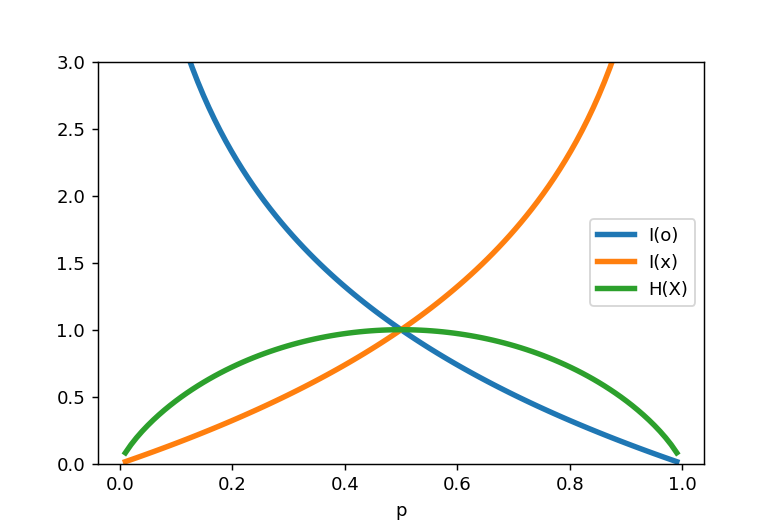

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

p = np.linspace(0.01, 0.99, num=100)
H = -p*np.log2(p) - (1-p)*np.log2(1-p)
fig, ax = plt.subplots(1, figsize=(6, 4), sharex=True)
ax.set_xlabel('p')
ax.plot(p, -np.log2(p), label='I(o)', lw=3)
ax.plot(p, -np.log2(1-p), label='I(x)', lw=3)
ax.plot(p, H, label='H(X)', lw=3)
ax.set_ylim([0, 3])
plt.legend();

**Ejercicio:**

Sea una fuente que escupe un entero x que está entre 0 y 31

Considere el resultado de las siguientes preguntas ¿Cúal tiene mayor entropía?
- ¿Es x igual a 0?
- ¿Es x un número primo?
- ¿Es x mayor a 15?

¿Cuál es el número mínimo de preguntas con respuesta si/no que se deben hacer para adivinar el valor de x?


### Ejemplo 2: Meteorólogos del siglo XIX

- Nos encontramos a finales del siglo XIX
- La estación meteorológica de Niebla hace una predicción del tiempo en Valdivia
- Esta información se envía a Valdivia a través de telegrafo
- Calcule la cantidad de información promedio que envía la estación a Valdivia en cada escenario usando la **entropía de Shannon**

**Escenario 1:** Dos posibilidades: Lluvia y nublado, con probabilidad $1/2$ y $1/2$, respectivamente

**Escenario 2:** Una posibilidad: Lluvia, con probabilidad $1$

**Escenario 3:** Cuatro posibilidades: Lluvia, Nublado, Nubosidad parcial, soleado, con probabilidad $1/2$, $1/4$, $1/8$ y $1/8$, respectivamente

1. Las probabilidades de cada mensaje son $2^{-1}$, $2^{-2}$, $2^{-3}$ y $2^{-3}$
1. La cantidad de información de cada mensaje es: 1, 2, 3 y 3 bits, respectivamente
1. La entropía es $1/2 + 1/2 + 3/8 + 3/8 = 1.75$ bits

Para el **escenario 3** códifique las alternativas usando un alfabeto de códigos binarios

> ¿Cómo le asignamos un código a cada alternativa?

### Código de ancho fijo

- Tenemos cuatro estados, necesitamos 2 bits
- Cada estado: 00, 01, 10, 11
- En este caso resulta equivalente a asumir equiprobabilidad 
- La entropía es 2 bits

### Código de ancho variable (prefijo)

- Se usa 1, 2, 3 y 3 bits para cada estado, según su probabilidad de aparición
- La entropía es 1.75 bits
- Podemos describir este escenario según
    - Primera decisión equiprobable: Lluvia **(0)** vs El resto (1)
    - Segunda decisión equiprobable: Nublado **(10)** vs El resto menos lluvia (11)
    - Tercera decisión equiprobable: Nubosidad parcial **(110)** vs soleado **(111)**
- Podemos escribir esto como un dendograma

<center><img src="../images/dendogram.png" width="600"></center>

- Algoritmo de codificación con forma de árbol en base 2
- Los mensajes codificados están en las hojas del árbol
- **Código préfijo**: Ningún código puede ser prefijo de otro. 
- El código prefijo garantiza decodificación sin ambiguedad


**Ejercicio**

Decodifique la predicción del tiempo para los próximos tres días: 101100 

**Ejemplo de código ambiguo** 

Si el código de lluvia fuera **1** en lugar de 0, decodifique el siguiente mensaje: 11111



### Ejemplo 3: Entropía y cantidad de bits del fragmento del famoso texto


In [ ]:
# Código de largo fijo:
display(5*len(texto))
# Código de largo variable:
freq = np.array(list(Counter(texto).values()))
p = freq/np.sum(freq)
display(int(-np.sum(p*np.log2(p))*len(texto)))

**Reflexionemos:** 
- ¿Es la codificación de largo variable *lossless* o *lossy*?
- En ciertos casos las palabras son más largas de lo que eran originalmente, ¿Cómo comprimimos entonces?

## Codificación de Huffman

Un algoritmo sencillo de codificación de tipo prefijo:

1. Se estima la probabilidad $p_i$ de cada símbolo
1. Se ordenan los símbolos en orden descendente según $p_i$
1. Juntar los dos con probabilidad menor en un grupo, su probabilidad se suma
1. Volver al paso 2 hasta que queden dos grupos
1. Asignarle 0 y 1 a las ramas izquierda y derecha del árbol, respectivamente
1. El código resultante se lee desde la raiz hasta la hoja

<center><a href="http://www.skylondaworks.com/sc_huff.htm"><img src="../images/huff.gif" width="600"></a></center>


**Debilidad de Huffman:** 
- Códigos con diccionarios/probabilidades variables
- En ese caso combiene usar codificación aritmética o Lempel-Ziv



### Ejemplo 4: Codificación de Huffman del famoso texto

Primero estimamos la frecuencia usando `collections.Counter`

Luego construimos el dendograma usando `heapq`

Terminamos con un diccionario que transforma cada símbolo del texto en un código

In [ ]:
# Implemetación adaptada de https://rosettacode.org/wiki/Huffman_coding#Python
import heapq
# Construir dendograma con las probabilidades ordenadas
dendograma = [[frequencia/len(texto), [simbolo, ""]] for simbolo, frequencia in Counter(texto).items()]
heapq.heapify(dendograma)
# Crear el código
while len(dendograma) > 1:
    lo = heapq.heappop(dendograma)
    hi = heapq.heappop(dendograma)
    for codigo in lo[1:]:
        codigo[1] = '0' + codigo[1]
    for codigo in hi[1:]:
        codigo[1] = '1' + codigo[1]
    heapq.heappush(dendograma, [lo[0] + hi[0]] + lo[1:] + hi[1:])
# Convertir código a diccionario
dendograma = sorted(heapq.heappop(dendograma)[1:])
dendograma = {simbolo : codigo for simbolo, codigo in dendograma} 
display(dendograma)

Ahora podemos convertir el texto en una tira binaria

In [ ]:
texto_codificado = ""
for letra in texto:
    texto_codificado += dendograma[letra]

display(texto_codificado[:1000])

Pudemos usar `bytearray` para convertir nuestra tira de caracters 0 y 1 a un arreglo de Bytes

In [ ]:
b = bytearray()
for i in range(0, len(texto_codificado), 8): # Si el largo del texto no es múltiplo de 8 debemos hacer padding
    byte = texto_codificado[i:i+8]
    b.append(int(byte, 2))

Guardando el archivo en disco:

In [ ]:
with open("../quijote_comprimido.bin", "wb") as f: # Agregamos el diccionario en el header    
    f.write(str(dendograma).encode())
with open("../quijote_comprimido.bin", "a") as f: # salto de linea
    f.write("\n")
with open("../quijote_comprimido.bin", "ab") as f: # Texto codificado
    f.write(bytes(b))
!du -B1 --apparent-size ../quijote*

En el cuadernillo [quijote_recuperado.ipynb](quijote_recuperado.ipynb) puedes revisar como se descomprime el texto

***

Hemos visto que en general las señales/datos tienen alta redundancia 

> Piense por ejemplo en el caso de las imágenes o el lenguaje (contexto)

Hemos visto también como comprimir datos

En particular 
1. Transformamos los datos tal de hacerlos "más independientes"
1. Opcionalmente los cuantizamos para eliminar información menos importante
1. Codificamos los datos con una distribución que sea óptima para el canal de transmisión

Este último paso es lo que llamamos **codificación de fuente**

A continuación revisaremos un importante teorema enunciado por Shannon respecto a la **codificación de un mensaje**

# Teorema de codificación de fuente de Shannon (*Source coding theorem*)


>Dada una variable aleatoria $X$ con entropía $H(X)$ existe una codificación de largo variable cuyo largo de palabra promedio $\bar L$ satisface

>$$
H(X) \leq \bar L < H(X) + 1
$$

Es decir que el límite inferior teórico del largo de palabra es $H(X)$

Esta codificación sin pérdida y de largo variable la llamamos **codificación entrópica** 

Este teorema 
- nos dice cuanto podemos comprimir una señal sin que hayan pérdidas antes de enviarla por un canal (libre de ruido)
- justifica la definición de entropía como medida de la cantidad de información


Otra forma de ver el teorema

Sea una fuente $X$ que emite $N$ mensajes. 

> Los N mensajes pueden comprimirse en $N H(X)$ [bits] o más con riesgo de pérdida despreciable ($N\to\infty$)

Por el contrario

> Si comprimimos en menos de $N H(X)$ [bits] la pérdida está garantizada

#### Probando el teorema

Sea una codificación C para una variable aleatoria $X$ con N posibles símbolos

Cada símbolo $x_i$ tiene una probabilidad de ocurrencia $p_i \in [0, 1]$ con $\sum_i p_i = 1$ y un largo de código $L_i$

Luego el largo promedio de los códigos es

$$
\bar L = \sum_{i=1}^N p_i L_i
$$

¿Qué valores de $L_i$ resultan en el menor $\bar L$? 

> El largo óptimo es $L_i^* = -\log_2 p_i$ y el promedio sería $\bar L^* = H(X)$

Digamos que proponemos otro largo $\hat L_i = - \log_2 q_i$, asumiendo que $\sum_i q_i = 1$

Luego el largo promedio sería

$$
\begin{align}
\bar L &= \sum_{i=1}^N p_i \hat L_i  = - \sum_{i=1}^N p_i \log_2 q_i \nonumber \\
&= - \sum_{i=1}^N p_i \log_2 q_i - \sum_{i=1}^N p_i \log_2 p_i + \sum_{i=1}^N p_i \log_2 p_i \nonumber \\
&= - \sum_{i=1}^N p_i \log_2 p_i + \sum_{i=1}^N p_i \log_2 \frac{p_i}{q_i} \nonumber \\
&= H(X) + \sum_{i=1}^N p_i \log_2 \frac{p_i}{q_i} \geq H(X) \nonumber
\end{align}
$$
> Con esto probamos que no hay mejor largo que $-\log_2 p_i$

Notemos que los $L_i^*$ no tendrían porque ser un número enteros 

> En general la codificación óptima cumple: $H(X) \leq \bar L^* < H(X) + 1$

- Se puede estar entre esas cotas con el algoritmo de Huffman
- La codificación aritmética en cambio casi siempre llega a la cota inferior
- La codificación de Huffman y aritmética son **codificaciones entrópicas**